# SVM - Support Vector Machine

### Setting up the dataset, (SHOULD BE ONLY RUN ONCE)

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize
import glob

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 250:  # better to use height rather than area.
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            print ('Characters recognized: ' + str(len(final)))
        return final
    
    def __init__(self):
        print("Extracting characters...")


start_time = time.time()
extract = Extract_Letters()
trainingDirectory = "./ocr/training/"
training_files = glob.glob(f"{trainingDirectory}*.png")

print(len(training_files))
# training_files = ['./ocr/training/training1.png', './ocr/training/training2.png','./ocr/training/training3.png','./ocr/training/training4.png','./ocr/training/training6.png']

folder_string = "абвгдђежзијклљмнњопрстћуфхцчџшабвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
name_counter = 600
for files in training_files:
    letters = extract.extractFile(files)
    string_counter = 0

    for i in letters:
        if string_counter > 71:
            string_counter = 0
        imsave('./training_type/' + str(folder_string[string_counter]) + '/' + str(name_counter) + '_snippet.png', i)
        
        string_counter += 1
        name_counter += 1

print (time.time() - start_time, "seconds" )

Extracting characters...
8


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


Characters recognized: 24
Characters recognized: 42
Characters recognized: 64
Characters recognized: 72
Characters recognized: 97
Characters recognized: 114
Characters recognized: 134
Characters recognized: 144
Characters recognized: 167
Characters recognized: 186
Characters recognized: 207
Characters recognized: 216
Characters recognized: 240
Characters recognized: 258
Characters recognized: 282
Characters recognized: 288
Characters recognized: 315
Characters recognized: 330
Characters recognized: 351
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Characters recognized: 23
Characters recognized: 30
Characters recognized: 55
Characters recognized: 72
Characters recognized: 92
Characters recognized: 102
Characters recognized: 123
Characters recognized: 144
Characters recognized: 163
Characters recognized: 174
Characters recognized: 196
Characters recognized: 216
Characters recognized: 235
Characters recognized: 246
Characters recognized: 269
Characters recognized: 288
Characters recognized: 308
Characters recognized: 318
Characters recognized: 341
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

Characters recognized: 23
Characters recognized: 42
Characters recognized: 57
Characters recognized: 71
Characters recognized: 72
Characters recognized: 88
Characters recognized: 104
Characters recognized: 114
Characters recognized: 133
Characters recognized: 144
Characters recognized: 165
Characters recognized: 186
Characters recognized: 209
Characters recognized: 216
Characters recognized: 242
Characters recognized: 258
Characters recognized: 276
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Charact

Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
Characters recognized: 288
C

Characters recognized: 19
Characters recognized: 30
Characters recognized: 52
Characters recognized: 72
Characters recognized: 91
Characters recognized: 102
Characters recognized: 123
Characters recognized: 144
Characters recognized: 165
Characters recognized: 174
Characters recognized: 198
Characters recognized: 216
Characters recognized: 237
Characters recognized: 246
Characters recognized: 270
Characters recognized: 288
Characters recognized: 308
Characters recognized: 318
Characters recognized: 340
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Characters recognized: 360
Charac

Characters recognized: 21
Characters recognized: 42
Characters recognized: 55
Characters recognized: 68
Characters recognized: 72
Characters recognized: 85
Characters recognized: 98
Characters recognized: 114
Characters recognized: 129
Characters recognized: 144
Characters recognized: 159
Characters recognized: 174
Characters recognized: 186
Characters recognized: 209
Characters recognized: 216
Characters recognized: 242
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characters recognized: 258
Characte

16.08688759803772 seconds


## Extracting Training Data

In [2]:
## For image recognition
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

##For image analysis
from skimage.io import imread
from skimage.transform import resize

##Library for extracting all images in a directory
import glob
import sys

## CONSTANTS
folder_strings = "абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
smallestNumberOfElementsInEachCollection=sys.maxsize;

def printImage(dataImage,letterArray,index):
    if(len(dataImage.shape)<=2):
        overall=[]
        temp = []
        counter = 0
        for x in range(len(dataImage[index])):
            temp.append(dataImage[index][x])
            counter=counter+1
            if(counter==20):
                overall.append(temp)
                counter=0
                temp=[]
            
        overall=np.asarray(overall)
        plt.imshow(overall, cmap='Greys', vmin=0, vmax=255)
        plt.suptitle(f"Letter: {letterArray[index]}", fontsize=20)
        plt.show()
        print(f"Letter: {letterArray[index]}")
        return
    
    plt.imshow(dataImage[index], cmap='as_gray', vmin=0, vmax=255)
    plt.suptitle(f"Letter: {letterArray[index]}", fontsize=20)
    plt.show()

def printAllImagesInDataSetWithPrediction(dataImage,letterArray,model,printImageToScreen=True,skip=0):
    local=smallestNumberOfElementsInEachCollection
    if(skip>0):
        local=skip
    print(len(dataImage))
    for x in range(0,len(dataImage),local):
        if(printImageToScreen):
            printImage(lettersArray,lettersTarget,x)
        print(f"The Model predicted {model.predict(lettersArray[x].reshape(1,-1))}, actual {lettersTarget[x]}")
        

# This method is vital to ensure that appropraite parsable data is extracted
def generateTrainingDataArray(training_type):
    global lettersTarget
    global smallestNumberOfElementsInEachCollection
    folder_strings = "абвгдђежзијклљмнњопрстћуфхцчџш0123456789()"
    lettersTarget=[]
    overallData=[]
    for letter in folder_strings:
        filenames = glob.glob(f"training_type/{letter}/*.png")
        for file in filenames:
            img = imread(file,as_grey=True)
            arr = np.asarray(img)
            arr=arr.flatten()# Make dimension of array a singular arrary(SO normally its 20x20 array into 1d of size 400)
            
            # Converts the image to numbers, then labels in the array letters
            overallData.append(arr)
            lettersTarget.append(letter)
        smallestNumberOfElementsInEachCollection=min(smallestNumberOfElementsInEachCollection,len(filenames))
    return np.asarray(overallData)
            
lettersTarget=[]
lettersArray=generateTrainingDataArray("training_type")
print(f"Finished generating the training dataset, dim of array {lettersArray.shape}")

/home/jeeson/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Finished generating the training dataset, dim of array (2520, 400)


## Training Model

Key things to keep in mind 

the n_jobs=-1, enable parallel calculation otherwise it does it serially, so only diff is execution time

‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
Read more here: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [3]:
# Import model KNN training model
from sklearn import svm
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Analysis metrics
from sklearn import metrics
from sklearn.utils import shuffle


#Create KNN Classifier
model =  svm.SVC(kernel='rbf')

##Below is not really needed, but present instead corss-validation on test data is needed
lettersShuffled,targetShuffled = shuffle(lettersArray,lettersTarget) ## Ensures non bias suffling

model.fit(lettersShuffled.reshape((len(lettersShuffled), -1)), targetShuffled)

y_pred = model.predict(lettersShuffled)

print("Accuracy, with 100% of test and target being training( I.e just checking if method is workig):",metrics.accuracy_score(targetShuffled, y_pred))


Accuracy, with 100% of test and target being training( I.e just checking if method is workig): 0.7440476190476191


## Extracting Testing Data

Below are the methods for extracting the testing data

In [4]:

## For image recognition
import matplotlib.cm as cm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

##For image analysis
from skimage.io import imread as mainImageRead
from skimage.transform import resize
from scipy.misc import imread, imresize, imsave
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.transform import resize

##Library for extracting all images in a directory
import glob
import re
import string

class Extract_Letters:
    def extractFile(self, filename):
        image = imread(filename, 1)

        # apply threshold in order to make the image binary
        bw = (image < 120).astype(np.float)

        # remove artifacts connected to image border
        cleared = bw.copy()
        # clear_border(cleared)

        # label image regions
        label_image = label(cleared, neighbors=8)
        borders = np.logical_xor(bw, cleared)
        label_image[borders] = -1

        letters = list()
        order = list()

        for region in regionprops(label_image):
            minr, minc, maxr, maxc = region.bbox
            # skip small images
            if maxr - minr > len(image) / 175:##175 MAKES IT IDEAL FOR DATA EXTRACTION!
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                order.append(region.bbox)

        # sort the detected characters left->right, top->bottom
        lines = list()
        first_in_line = ''
        counter = 0

        # worst case scenario there can be 1 character per line
        for x in range(len(order)):
            lines.append([])

        for character in order:
            if first_in_line == '':
                first_in_line = character
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) < (first_in_line[2] - first_in_line[0]):
                lines[counter].append(character)
            elif abs(character[0] - first_in_line[0]) > (first_in_line[2] - first_in_line[0]):
                first_in_line = character
                counter += 1
                lines[counter].append(character)

        for x in range(len(lines)):
            lines[x].sort(key=lambda tup: tup[1])

        final = list()
        prev_tr = 0
        prev_line_br = 0

        for i in range(len(lines)):
            for j in range(len(lines[i])):
                tl_2 = lines[i][j][1]
                bl_2 = lines[i][j][0]
                if tl_2 > prev_tr and bl_2 > prev_line_br:
                    tl, tr, bl, br = lines[i][j]
                    letter_raw = bw[tl:bl, tr:br]
                    letter_norm = resize(letter_raw, (20, 20))
                    final.append(letter_norm)
                    prev_tr = lines[i][j][3]
                if j == (len(lines[i]) - 1):
                    prev_line_br = lines[i][j][2]
            prev_tr = 0
            tl_2 = 0
            ##print ('Characters recognized: ' + str(len(final)))
        print(f"Totally recognised {len(final)} characters")
        return final
    
    def __init__(self):
        print("Extracting characters...")


################################## Extracting training data #############################################

# Global values
trainingDirectory = "ocr/testing/"
testingCreatedDirectory = "ocr/beingTested/"
testingFileNames=[]

#Get associated testing data
def getTestingDataText(pureFileName):
    ##Method for getting associated text 
    associatedTextLocation = glob.glob(f"{trainingDirectory+pureFileName}*.txt")[0]
    print(associatedTextLocation)
    fileReader = open(associatedTextLocation, 'r')
    textFileArray = fileReader.readlines()
    fileReader.close()
    textFileArray="".join(textFileArray).lower()##Removes new line and makes it lowercase
    textFileArray = textFileArray.replace(" ","").replace("\n","")
    for letter in string.punctuation:
        if(letter!=")" and letter!="("):
            textFileArray = textFileArray.replace(letter,"")
    textFileArray=list(textFileArray)
    return textFileArray

##Generate array of elements into array
def generateTestingDataArray():
    global lettersTestTarget
    global testingFileNames
    extract = Extract_Letters()
    allTestingFiles = glob.glob(f"{trainingDirectory}*.png")
    finalImagesResult=[]
    finalTextResult=[]
    counter = 0
    for fileName in allTestingFiles:
        pureFileName=fileName.replace(".png","").replace(trainingDirectory,"")
        testingText = getTestingDataText(pureFileName) ##Returns the array of strings in the associated text
        lettersTestTarget.append(testingText)
        testingFileNames.append(pureFileName)
        
        extractedImages=extract.extractFile(fileName)
        imageNumericalArray=[]
        for image in extractedImages:
            imsave(f"{testingCreatedDirectory}{counter}.png", image)
            img = mainImageRead(f"{testingCreatedDirectory}{counter}.png",as_grey=True)
            arr = np.asarray(img)
            arr=arr.flatten()# Make dimension of array a singular arrary(SO normally its 20x20 array into 1d of size 400)
            counter=counter+1
            # Converts the image to numbers, then labels in the array letters
            imageNumericalArray.append(arr)
        finalImagesResult.append(np.asarray(imageNumericalArray))
    return np.asarray(finalImagesResult)
        
  
            
lettersTestTarget=[]
lettersTestArray=generateTestingDataArray()


Extracting characters...
ocr/testing/spacex2_ground_truth .txt


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Totally recognised 1825 characters


/home/jeeson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
/home/jeeson/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


## Methods for calculating Associated Metrics :)

In [5]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#Remember that printmd is just but cooler looking :)
from sklearn import metrics
import seaborn as sn
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score , f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def printConfusionMatrixToScreen(confusionMatrix):
    print("As pure print")
    for x in range(len(confusionMatrix)):
        print("[",end="")
        for y in range(len(confusionMatrix[x])):
            print(f"|{confusionMatrix[x][y]}|",end="")
        print("]")
      
      
def plotConfusionMatrix(prediction,target,fileName):
    confusionMatrix=confusion_matrix(target,prediction)
    df_cm = pd.DataFrame(confusionMatrix, index = [i for i in range(len(confusionMatrix[0]))],
                  columns = [i for i in range(len(confusionMatrix[0]))])
    plt.figure(figsize = (24,14))
    plt.suptitle(f"{fileName[0].upper()+fileName[1:]} Confusion Matrix", fontsize=50)
    sn.heatmap(df_cm, annot=True)
    plt.show()
    ##printConfusionMatrixToScreen(confusionMatrix)

    
def calculateAccuracyMetrics(prediction,target):
    printmd(f"**Accuracy:** {metrics.accuracy_score(target,prediction)}\n")
    printmd(f"**Precision:** {precision_score(target, prediction,average='weighted',zero_division=1)}")
    printmd(f"**Recall:** {recall_score(target, prediction,average='weighted')}")
    printmd(f"**F1 score:** {f1_score(target, prediction,average='weighted')}")
            
def plotRocAucCurve(clf,X_test,y_test):
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)##[::,1]
    print(y_pred_proba,y_pred_proba[::,1])
    
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba, pos_label=2)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#     plt.legend(loc=4)
#     plt.show()
      

## Test Model Against Testing Data and Associated Metrics!

<h1 style="color:skyblue">For File: spacex2<h1>

ArrayImageSize: (1825,), TargetLettersSize:1825
Associated metrics:

**Accuracy:** 0.9402739726027397


**Precision:** 0.9869522629189619

**Recall:** 0.9402739726027397

**F1 score:** 0.9538860783523273

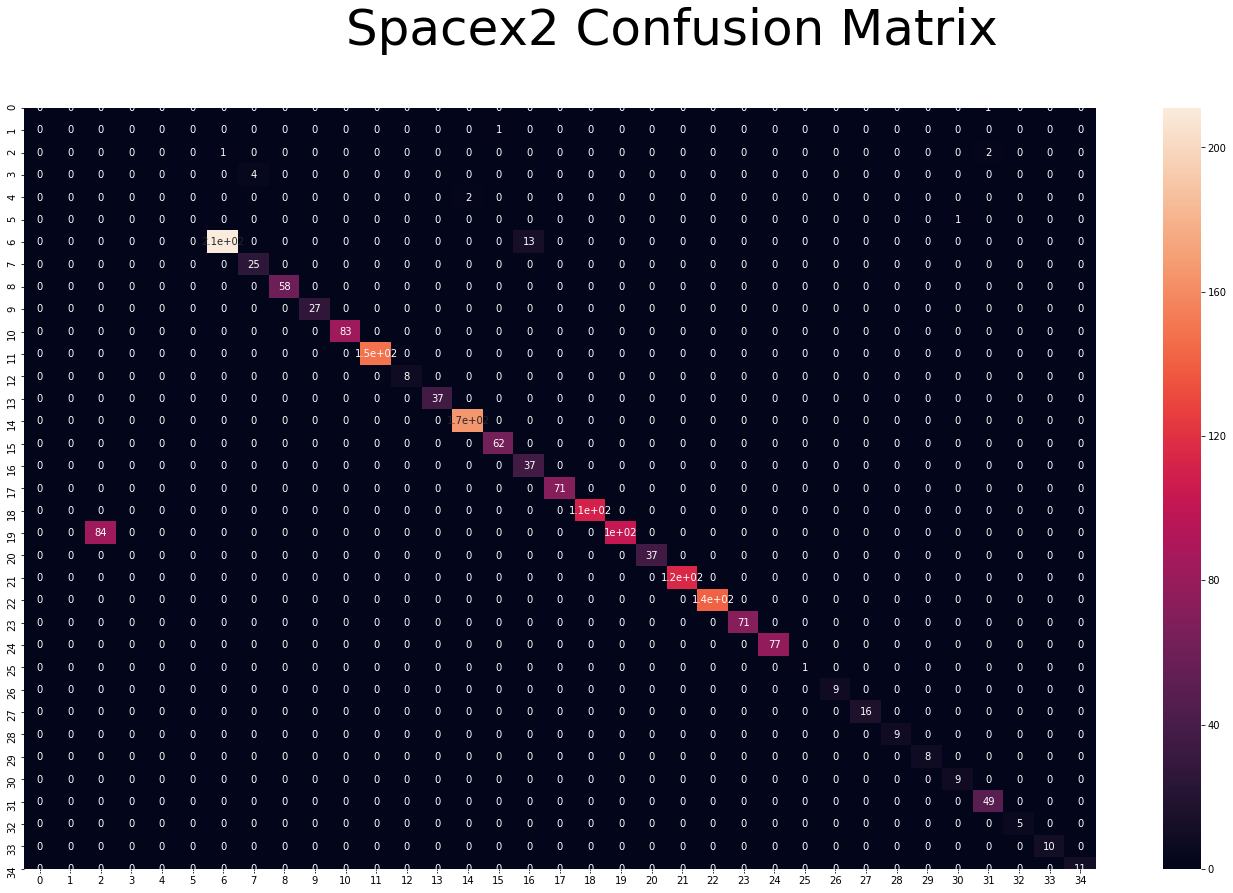

In [6]:
def runModelAcrossAllFiles(model,lettersTestArray,lettersTestTarget):
    for fileArrayIndex in range(len(lettersTestArray)):
        printmd(f"<h1 style=\"color:skyblue\">For File: {testingFileNames[fileArrayIndex]}<h1>")
        modelPrediction = model.predict(lettersTestArray[fileArrayIndex])
        print(f"ArrayImageSize: {modelPrediction.shape}, TargetLettersSize:{len(lettersTestTarget[fileArrayIndex])}")
        print("Associated metrics:",end="")
        targetStrings = lettersTestTarget[fileArrayIndex]
        
        # Differnet Evaluation Metrics
        calculateAccuracyMetrics(modelPrediction,targetStrings)
        plotConfusionMatrix(modelPrediction,targetStrings,testingFileNames[fileArrayIndex])
#         plotRocAucCurve(model,lettersTestArray[fileArrayIndex],targetStrings)


runModelAcrossAllFiles(model,lettersTestArray,lettersTestTarget)
# printAllImagesInDataSetWithPrediction(lettersTestArray[1],lettersTestTarget,model,True,skip=100)